# Project-Statistical Learning

# Data Description:

The data at hand contains medical costs of people characterized by certain attributes.

# Domain:

Healthcare

# Context:

Leveraging customer information is paramount for most businesses. In the case of an
insurance company, attributes of customers like the ones mentioned below can be crucial
in making business decisions. Hence, knowing to explore and generate value out of such
data can be an invaluable skill to have.

# Attribute Information:

age:age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively
high or low relative to height, objective index of body weight (kg / m ^ 2) using the
ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest,
northwest.

charges: Individual medical costs billed by health insurance

# Learning Outcomes:

 Exploratory Data Analysis
 Practicing statistics using Python
 Hypothesis testing

# Objective:

We want to see if we can dive deep into this data to find some valuable insights.

1.Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
import copy

2.Read the data as a data frame 

In [2]:
dataframe=pd.read_csv('insurance.csv') #Read the data 

a. Shape of the data 

In [3]:
dataframe.shape # shape of the data

(1338, 7)

In [4]:
dataframe.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


b.Data type of each attribute 

In [5]:
dataframe.dtypes #datatype of each attribute

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

 C.Checking the presence of missing values

In [6]:
dataframe.isnull().apply(pd.value_counts) #Checking the presence of missing values

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


No presence of missing value in dataset.

d.5 point summary of numerical attributes

In [7]:
dataframe.describe() # 5 point summary

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


 e.Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000006AA047DD08>,
      dtype=object)

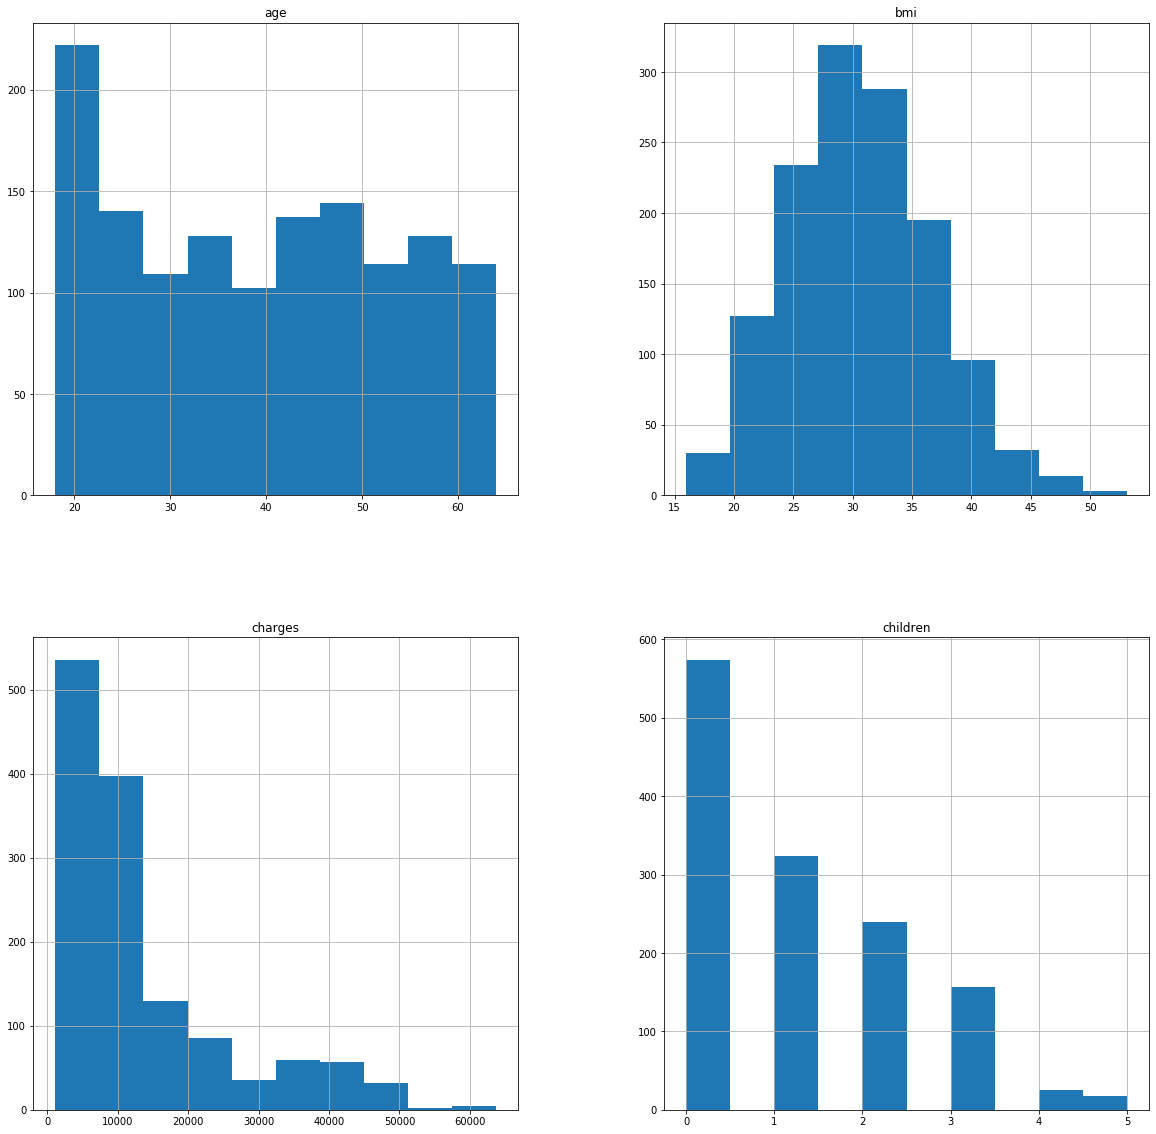

In [8]:
dataframe.hist(figsize=(20,20))

 f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [9]:
dataframe.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

From above plot we can say that,
1. 'bmi' is quiet normally distributed
2. 'age' looks like uniformally distributed (0.055)
3. 'Charges' is highly skewed on right hand side as it is positive(1.51)

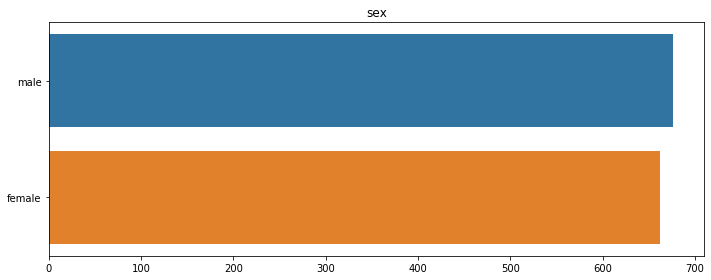

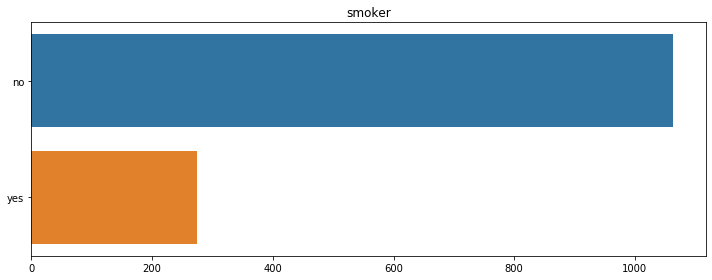

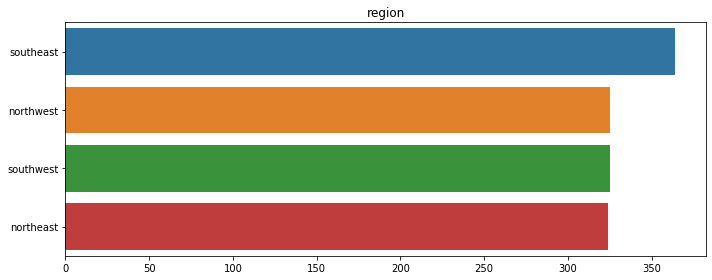

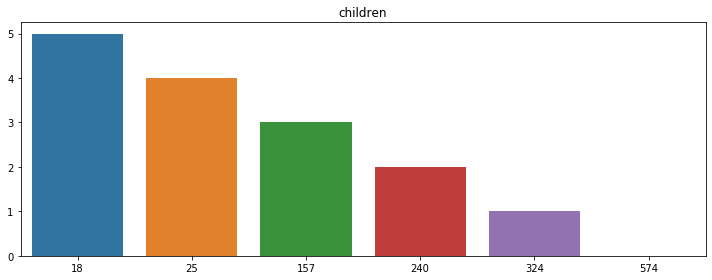

In [10]:
# Categorical Variables
categorical_variables=['sex','smoker','region','children']
for col in categorical_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(dataframe[col].value_counts().values,dataframe[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

Observations:
    1.Number of smoker is more than non smoker
    2.Instances are distributed evenly accross all regions
    3.Gender is also distributed evenly
    4.Most instances have less than 2 children and very few have 4 or 5 children Bi-variate distribution of every possible attribute pair

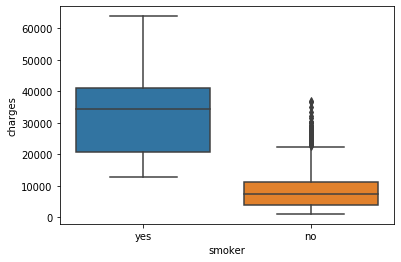

In [11]:
sns.boxplot(x="smoker", y="charges", data=dataframe)

{'whiskers': [<matplotlib.lines.Line2D at 0x6aa0719308>,
 'caps': [<matplotlib.lines.Line2D at 0x6aa07d3c48>,
 'boxes': [<matplotlib.lines.Line2D at 0x6aa0708488>],
 'medians': [<matplotlib.lines.Line2D at 0x6aa06f9888>],
 'fliers': [<matplotlib.lines.Line2D at 0x6aa07b3b88>],
 'means': []}

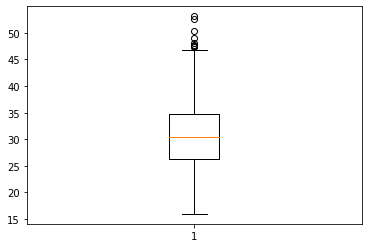

In [12]:
plt.boxplot(dataframe.bmi)

{'whiskers': [<matplotlib.lines.Line2D at 0x6aa072ef88>,
 'caps': [<matplotlib.lines.Line2D at 0x6aa06c5ec8>,
 'boxes': [<matplotlib.lines.Line2D at 0x6aa072e388>],
 'medians': [<matplotlib.lines.Line2D at 0x6aa07d8b88>],
 'fliers': [<matplotlib.lines.Line2D at 0x6aa06b2b08>],
 'means': []}

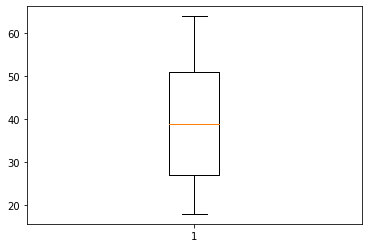

In [13]:
plt.boxplot(dataframe.age)

{'whiskers': [<matplotlib.lines.Line2D at 0x6aa0695ec8>,
 'caps': [<matplotlib.lines.Line2D at 0x6aa0694888>,
 'boxes': [<matplotlib.lines.Line2D at 0x6aa0695688>],
 'medians': [<matplotlib.lines.Line2D at 0x6aa0686808>],
 'fliers': [<matplotlib.lines.Line2D at 0x6aa06d9948>],
 'means': []}

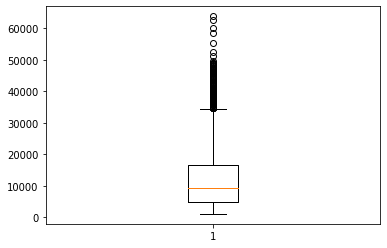

In [14]:
plt.boxplot(dataframe.charges)

We can say that some outliers are present in bmi and more outliers are present in charges

In [15]:
# Label Encoding
le=preprocessing.LabelEncoder()
dataframe.sex=le.fit_transform(dataframe.sex)
dataframe.smoker=le.fit_transform(dataframe.smoker)
dataframe.region=le.fit_transform(dataframe.region)

print(dataframe.shape)
dataframe.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


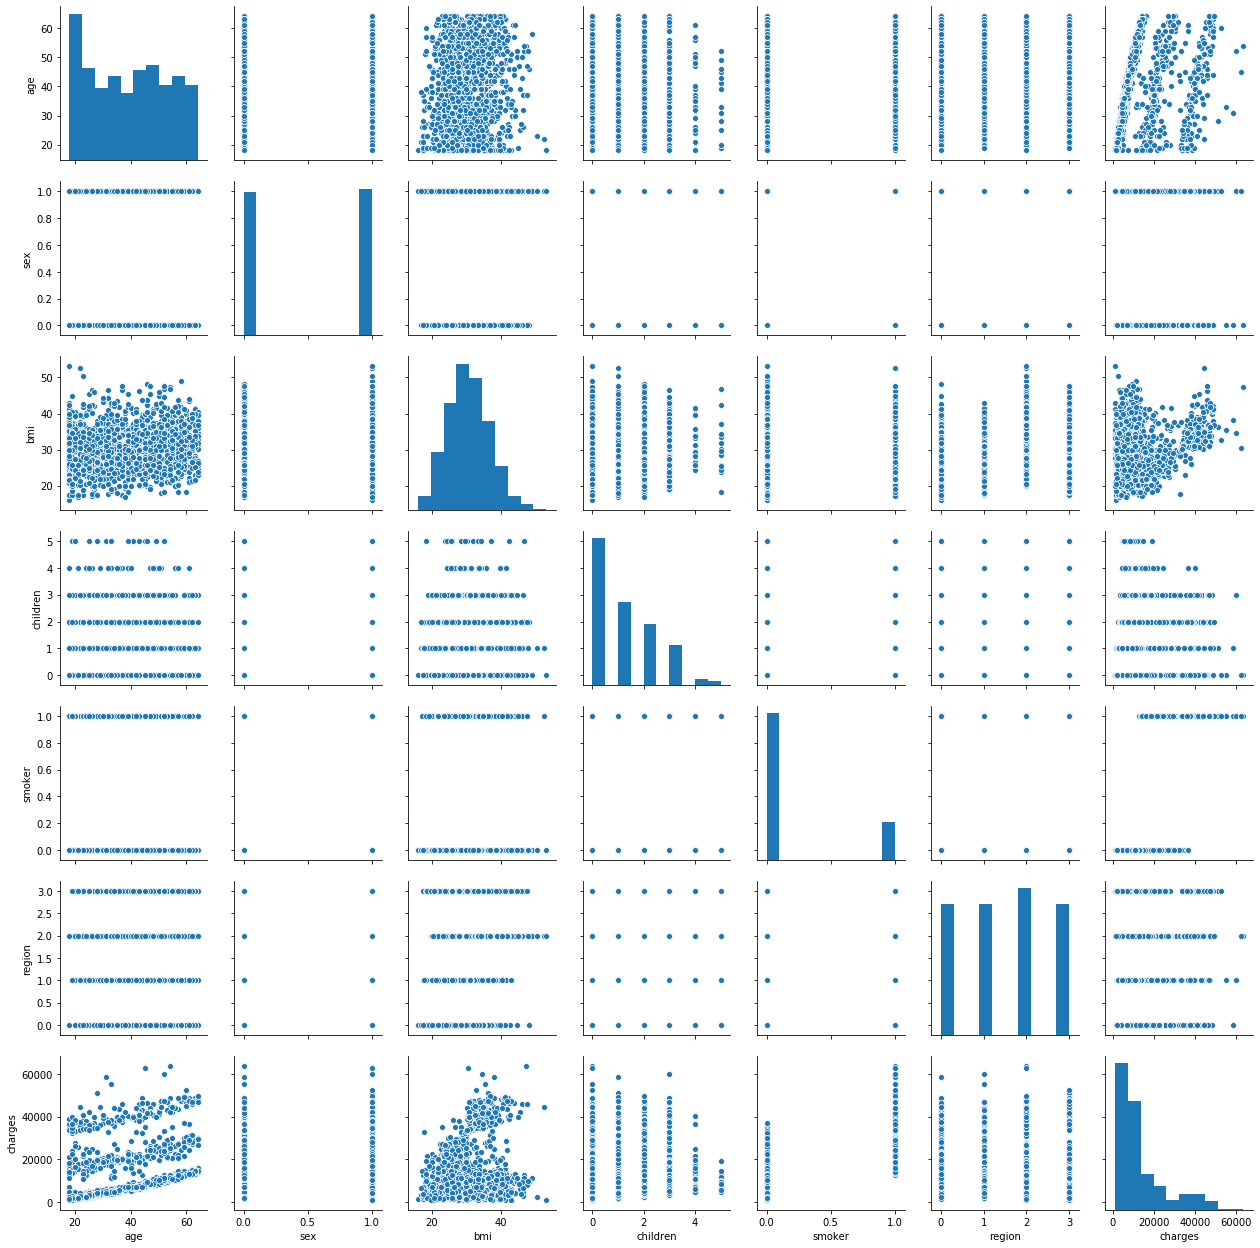

In [16]:
sns.pairplot(dataframe)

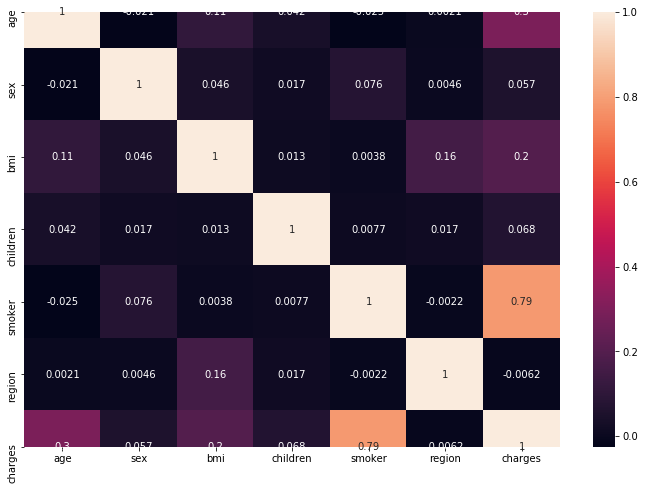

In [17]:
fig=plt.figure(figsize=(12,8))
sns.heatmap(dataframe.corr(),annot=True)#correlation function

Observations:
    1.'smoker'and 'charges' are highly correlated with each other. smoker charges more than non smoker.
    2.'bmi'and 'charges 'are also correlated 

# a. Do charges of people who smoke differ significantly from the people who don't?

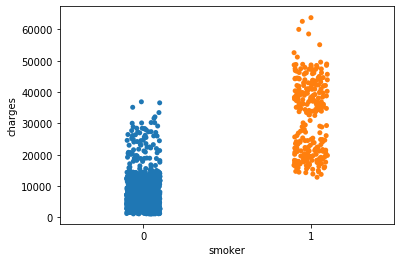

In [18]:
sns.stripplot(dataframe['smoker'],dataframe['charges'])

Visually the difference between charges of smokers and charges of non-smokers is apparent

In [19]:
 #T-test to check dependency of smoking on charges
Ho = "Charges of smoker and non-smoker are same"   # Stating the Null Hypothesis
Ha = "Charges of smoker and non-smoker are not the same"   # Stating the Alternate Hypothesis

In [20]:
x = np.array(dataframe[dataframe.smoker == 'yes'].charges)  # Selecting charges corresponding to smokers as an array
y = np.array(dataframe[dataframe.smoker == 'no'].charges) # Selecting charges corresponding to non-smokers as an array

C:\Users\SUPRIYA\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [21]:
t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of smoker and non-smoker are same as the p_value (nan) > 0.05


Smokers seem to claim significantly more money than non-smokers

# b. Does bmi of males differ significantly from that of females? 

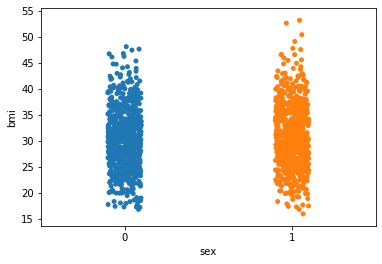

In [22]:
sns.stripplot(dataframe['sex'],dataframe['bmi'])

Visually, there is no apparent relation between 'gender' and 'bmi'

In [23]:
 #T-test to check dependency of bmi on gender
Ho = "Gender has no effect on bmi"   # Stating the Null Hypothesis
Ha = "Gender has an effect on bmi"   # Stating the Alternate Hypothesis

In [24]:
x = np.array(dataframe[dataframe.sex == 'male'].bmi)  # Selecting bmi values corresponding to males as an array
y = np.array(dataframe[dataframe.sex == 'female'].bmi) # Selecting bmi values corresponding to females as an array

In [25]:
t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

In [26]:
if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Gender has no effect on bmi as the p_value (nan) > 0.05


# c. Is the proportion of smokers significantly different in different genders?

In [27]:
# Chi_square test to check if smoking habits are different for different genders
Ho = "Gender has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Gender has an effect on smoking habits"   # Stating the Alternate Hypothesis
crosstab = pd.crosstab(dataframe['sex'],dataframe['smoker']) 

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Gender has an effect on smoking habits as the p_value (0.007) < 0.05


smoker,0,1
sex,,
0,547,115
1,517,159


# d.Is the distribution of bmi across women with no children, one children and 2 children is same?


In [28]:
Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis


female_df = copy.deepcopy(dataframe[dataframe['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No. of children has no effect on bmi as the p_value (nan) > 0.05


C:\Users\SUPRIYA\Anaconda3\lib\site-packages\scipy\stats\stats.py:3219: RuntimeWarning: Mean of empty slice.
  offset = alldata.mean()
C:\Users\SUPRIYA\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\SUPRIYA\Anaconda3\lib\site-packages\scipy\stats\stats.py:3222: RuntimeWarning: invalid value encountered in double_scalars
  sstot = _sum_of_squares(alldata) - (_square_of_sums(alldata) / bign)
C:\Users\SUPRIYA\Anaconda3\lib\site-packages\scipy\stats\stats.py:3225: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / len(a)
C:\Users\SUPRIYA\Anaconda3\lib\site-packages\scipy\stats\stats.py:3229: RuntimeWarning: invalid value encountered in double_scalars
  ssbn -= _square_of_sums(alldata) / bign
